Hypothesis Testing
Let's say that we're trying to determine if there were more or less graduates in the US in 2016 than in 2017. We believe that because of a changing economy that this number could be increasing. 

Formulating and Testing a Hypothesis
2 parts of a hypothesis: Null and Alternative
Null: Generally, what most would consider the expected result, that there is no significant difference between two groups
Alternative: What you are hypothesizing, that there is a significant difference between the two groups

Why are there two parts? Because you always need to compare your result to something else when determining if there is a scientific change in what you're comparing.

Our Hypothesis
H0: There is no significant difference between the mean number of graduates in 2016 and 2017.
HA: The difference between the mean number of graduates in 2016 and 2017 is less than 0.

Looking at data from the IPEDS Data Center (https://nces.ed.gov/ipeds/datacenter/Data.aspx), we can determine if the number of graduates from 2016 to 2017 are increasing or not.

Can be done with a paired samples t-test.
Assumptions:
1. Data must be an interval or ratio value (not ordinal or nominal)
2. Observations must not influence each other in any way.
3. There should not be any outliers.
4. The data should be normally distributed.

Since number of graduates are not categories of any kind, assumption 1 should be correct.
Since, typically, the number of graduates at one school do not determine the number from another school, assumption 2 is valid.
We must test for the remaining assumptions.

Originally, we were going to look at the IPEDS data center data, but it turned out to be highly skewed. Instead we will create our own data set that follows the above assumptions.

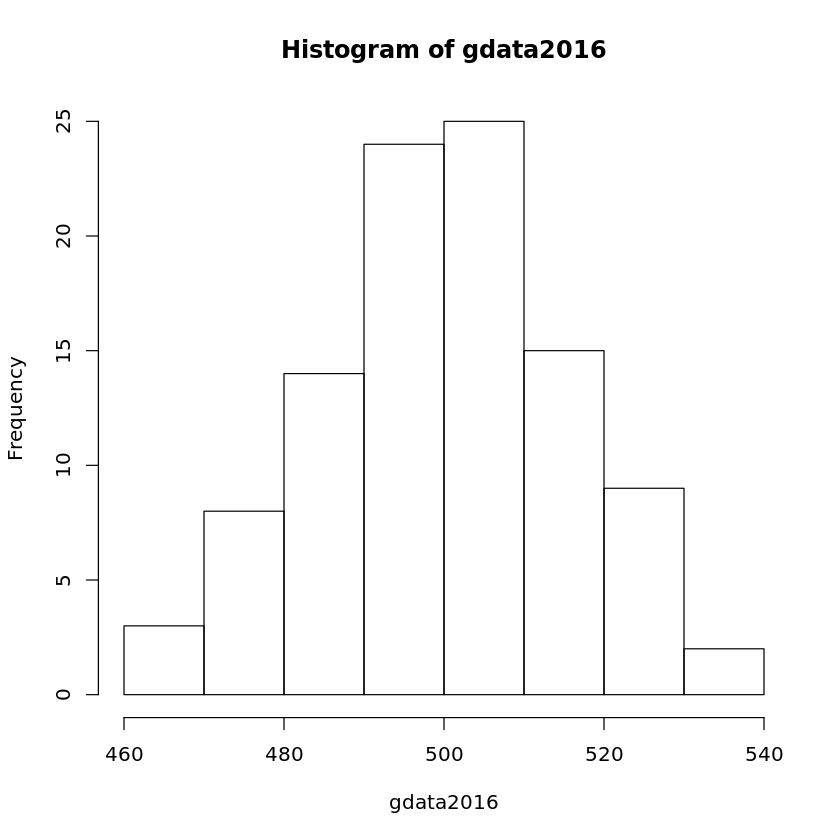

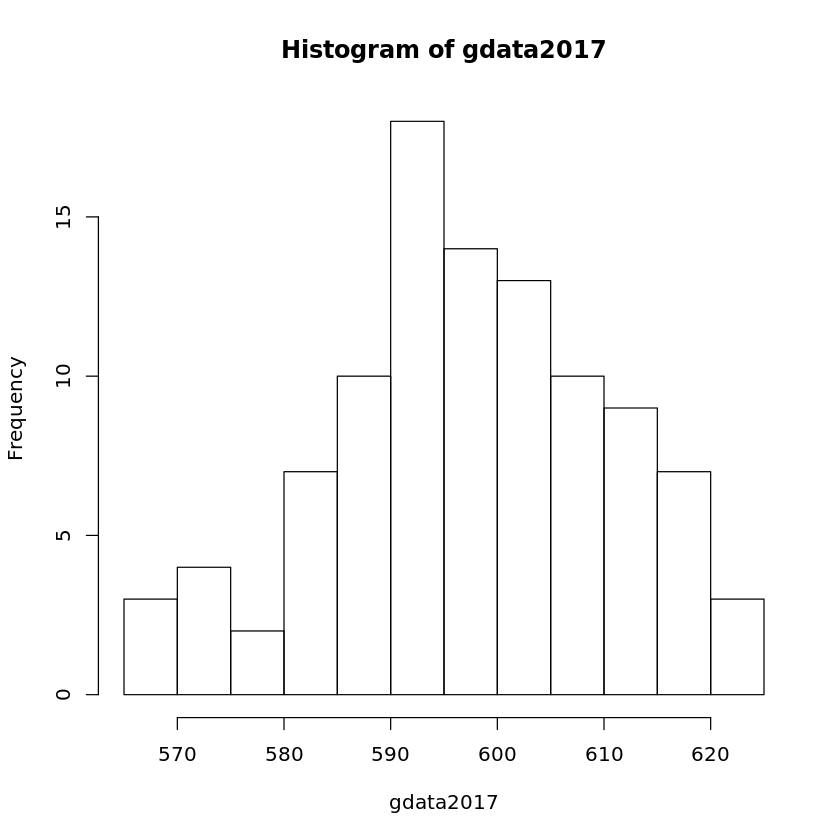

In [3]:
# Randomly generate data

gdata2016 <- rnorm(100, mean = 500, sd = 15)
gdata2017 <- rnorm(100, mean = 600, sd = 15)

# Plot new data
hist(gdata2016)
hist(gdata2017)


In [4]:
# Looks normal and there are no outliers. All assumptions are valid and we can move to the test.

t.test(gdata2016,gdata2017, alternative = "less")


	Welch Two Sample t-test

data:  gdata2016 and gdata2017
t = -47.489, df = 190.66, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -94.25022
sample estimates:
mean of x mean of y 
 499.9759  597.6249 


Results show that the number of graduates in 2017 was larger than the number in 2016. How do we know?

First, we have a negative t statistic. The way that the t-test works is that it takes the difference between the means of the two groups and divides the result by the standard error (standardizing the result). The result is that if the t-value is negative, the first group (2016) had a smaller mean than the second group (2017). Since this happens, we know that the number of graduates is increasing.
But how do we know that this is a good or bad result? The p-value.

P-value
A p-value is the probability of finding the result of the test when the null hypothesis (that there was no difference between the two years of graduates) is true.
A significance level (or alpha) is the benchmark that we use to determine if we reject the null hypothesis or keep it. Many times, alpha is set at 5%.

Our p-value was extremely small, meaning that there very likely is a large difference between the two years.

So why is it so important that the p-value is small?
We can classify our result into one of four categories: True positive, False positive, False negative, and True negative.

In [5]:
# Create a contingency table to show the four categories

contingencytable <- matrix(c("True Positive",  "False Negative", "False Positive","True Negative"),2)

dimnames(contingencytable) <- list( c("Predicted Positive","Predicted Negative"), c("True Positive", "True Negative"))

contingencytable

,True Positive,True Negative
Predicted Positive,True Positive,False Positive
Predicted Negative,False Negative,True Negative


To go back to our result, we were able to reject the null hypothesis based on our evidence.
A Type I error is a False Positive, rejecting the null hypothesis when it is actually the truth.
A Type II error is a False Negative, failing to reject the null hypothesis when it is false.

Looking at our contingency table, we can see that when our predicted value is positive, it can truly be either positive or negative. If it is truly negative (when predicted positive), that is a type I error. When our predicted value is negative, if it is truly positive, then we have committed a type II error.

Some additional measures of how well a test was run are precision and recall. Precision is the number of observations sampled that are relevant and recall is the number of relevant observations that are sampled. In our example, we only have one observation and it was true, so our precision is 1 and our recall is 1. However, if we were to complete our experiment a few more times with new data and had the below results:

In [6]:
moregrads <- matrix(c(10,2,3,7),2)

dimnames(moregrads) <- list( c("Predicted Positive","Predicted Negative"), c("True Positive", "True Negative"))

moregrads

# We would calculate precision as true positives divided by total predicted positive. 

10/(10+3)

# Recall would be true positives divided by total true positives.

10/(10+2)

,True Positive,True Negative
Predicted Positive,10,3
Predicted Negative,2,7


[1] 0.7692308

[1] 0.8333333

But let's say that we had a large number of experiments with very low p-values or very high p-values. The chances of these experiments being incorrectly classified is reduced based on how far away the p-values are from the significance level (or alpha). If our p-value was .02 and our significance level was .05, then we would be at least 95% confident that our result was not due to chance. 

However, if our p-value was .1 with the same significance level, we would not reject the null hypothesis and commit a type II error (assuming that the number of graduates really are increasing).